#Downloading and Importing dependencies

In [1]:
# quietly install 7zip
!pip install py7zr -q

# import libraries for data download
import py7zr, requests, os

# define a function to download data to notebook instance
def dl_from_gdrive(id, destination):
  def get_confirm_token(response):
    for key, value in response.cookies.items():
      if key.startswith('download_warning'):
        return value
    return None
  def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
      for chunk in response.iter_content(CHUNK_SIZE):
        if chunk: # filter out keep-alive new chunks
          f.write(chunk)
  URL = "https://docs.google.com/uc?export=download"
  session = requests.Session()
  response = session.get(URL, params = { 'id' : id }, stream = True)
  token = get_confirm_token(response)
  if token:
    params = { 'id' : id, 'confirm' : token }
    response = session.get(URL, params = params, stream = True)
  save_response_content(response, destination)

# download data contained in google drive 7zip files
dl_from_gdrive('1ai6QR_YQTPDRsDQ0s8AZg_c4dq4_E64s', 'tas_sn_w_datasets.7z')

# unzip the data file wiht 7zip
with py7zr.SevenZipFile('/content/tas_sn_w_datasets.7z', mode='r') as z:
  z.extractall(r'/content/')

# print the names of all files in /content/ directory after unzipping
print ('Files in /content/ directory:')
for i in os.listdir(r'/content/'):
  print ('  -  ', i)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.6 MB/s eta 0:00:00
Files in /content/ directory:
  -   .config
  -   sn_w_minoccs.gpkg
  -   tasgrav_IR_1VD.tif
  -   tasmag_TMI_1VD.tif
  -   tasrad_U_ppm.tif
  -   tasgrav_IR.tif
  -   tasrad_K_pct.tif
  -   tas_sn_w_datasets.7z
  -   tasmag_TMI.tif
  -   tasrad_Th_ppm.tif
  -   sample_data


In [2]:
# quietly install geospatial dependencies
!pip install geopandas -q
!pip install rasterio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 30.6 MB/s eta 0:00:00


In [3]:
import os
import numpy as np
import matplotlib as map
import matplotlib.pyplot as plt

import geopandas as gpd


#Importing and using DataSet

In [4]:
data_dir=r'/content'

geotiffs = [os.path.join(data_dir ,x) for x in os.listdir(data_dir) if '.tif' in x]
geotiffs

['/content/tasgrav_IR_1VD.tif',
 '/content/tasmag_TMI_1VD.tif',
 '/content/tasrad_U_ppm.tif',
 '/content/tasgrav_IR.tif',
 '/content/tasrad_K_pct.tif',
 '/content/tasmag_TMI.tif',
 '/content/tasrad_Th_ppm.tif']

In [5]:
df = gpd.read_file(r'sn_w_minoccs.gpkg')
df.head()

GID  DEPOSIT_ID                          NAME                 ALIAS  \
0   1987        1992                 Great Pyramid           Brocks Adit   
1  14795        2002              North Ringarooma  North Ringarooma Bay   
2   2008        2013  Western Pinnacles South area        Loila Pinnacle   
3  14800        2007                         Dunns                  None   
4  14834        2006                  North Orieco                  None   

   PARENT_ID              TYPE COMM_TYPE  \
0        NaN  Mine or Prospect    Metals   
1        NaN  Mine or Prospect    Metals   
2        NaN  Mine or Prospect    Metals   
3        NaN  Mine or Prospect    Metals   
4        NaN  Mine or Prospect    Metals   

                                 COMMODITYS  \
0  Tin, Silver, Copper, Arsenic, Lead, Zinc   
1                           Tin, Lead, Zinc   
2                               Tin, Copper   
3                      Copper, Arsenic, Tin   
4                                 Tin, Zinc   

                                            DESCRIPT  \
0                                   shafts and adits   
1                             a few surface trenches   
2                                surface exploration   
3  an adit and a shaft with pits and trenches alo...   
4  a shaft, gossanous outcrops extend 1 km along ...   

                            LOCALITY  ...  \
0                       Pyramid Hill  ...   
1              5-6km NW of Scamander  ...   
2                   Fitzgerald Creek  ...   
3  the western bank of Eastern Creek  ...   
4  Orieco Hill, ~6km NW of Scamander  ...   

                                           EXPL_TYPE OUTCROPS  WEATHERED  \
0  Drilling, Geochemical surveys, Geological mapp...     None       None   
1                   Geochemical surveys, Prospecting     None          Y   
2                                        Prospecting     None       None   
3  Geochemical surveys, Geological mapping, Prosp...     None          Y   
4  Drilling, Geological mapping, Geophysical surv...     None          Y   

   XTRCTBLTY  USES TESTS GENETIC DATA_MTLGA  \
0       None  None  None    None       None   
1       None  None  None    None       None   
2       None  None  None    None       None   
3       None  None  None    None       None   
4       None  None  None    None       None   

                                                 REF  \
0  UR1928A_064_71, TR8_25_45, GSB53, 84_2218, 86_...   
1    GSB53, UR1941_005_11, 84_2218, 90_3120, 17_7703   
2                               GSB53, UR1941_055_57   
3  GSB53, GSB09, UR1941_005_11, ER8515S0, 84_2218...   
4  GSB53, UR1941_005_11, ER8515S0, 84_2218, 90_31...   

                         geometry  
0  POINT (599712.822 5413483.986)  
1  POINT (600762.824 5413543.986)  
2  POINT (598312.820 5414283.987)  
3  POINT (601612.825 5414483.988)  
4  POINT (600942.824 5414563.988)  

[5 rows x 38 columns]

In [6]:
df.describe()

GID    DEPOSIT_ID     PARENT_ID      LOC_ACC          RL  \
count    199.000000    199.000000     82.000000   199.000000    9.000000   
mean    9608.572864   3505.447236  11057.902439   141.758794  505.777778   
std     6206.240979   3993.232708   2899.220153   132.546626  297.555364   
min      341.000000    257.000000   1070.000000    10.000000   70.000000   
25%     2407.500000   1166.500000  11714.000000   100.000000  260.000000   
50%    12956.000000   2031.000000  11714.000000   100.000000  605.000000   
75%    14723.000000   3313.500000  12172.000000   100.000000  742.000000   
max    20099.000000  16034.000000  12172.000000  1000.000000  870.000000   

           RL_ACC  
count   10.000000  
mean    25.000000  
std     27.386128  
min     10.000000  
25%     10.000000  
50%     17.500000  
75%     25.000000  
max    100.000000

<Axes: >

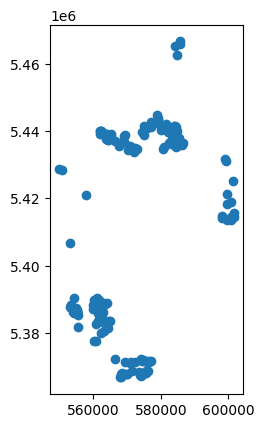

In [7]:
df.plot()

Importing rasterio model

In [8]:
import rasterio

#read geotiffs
data, names = [], []
for fn in geotiffs:
  with rasterio.open(fn, 'r') as src:
    #read spatial information
    transform = src.transform
    region = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top) #contains the extreme bounds of the images
    #read band 1 data
    d= src.read(1)
    nodata_mask = d==src.nodata
    d[nodata_mask] = np.nan
    #append data to list
    data.append(d)
    names.append(os.path.basename(fn).replace('.tif',''))

data, names

([array([[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         ...,
         [368.49176, 398.31467, 428.22516, ...,       nan,       nan,
                nan],
         [385.5012 , 415.64713, 445.92328, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan]], dtype=float32),
  array([[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         ...,
         [1.1658906, 1.6448274, 1.093056 , ...,       nan,       nan,
                nan],
         [0.4476774, 0.952381 , 0.5

In [9]:
#stack data into 3D numpy array
data = np.stack(data)
data.shape

(7, 2633, 1876)

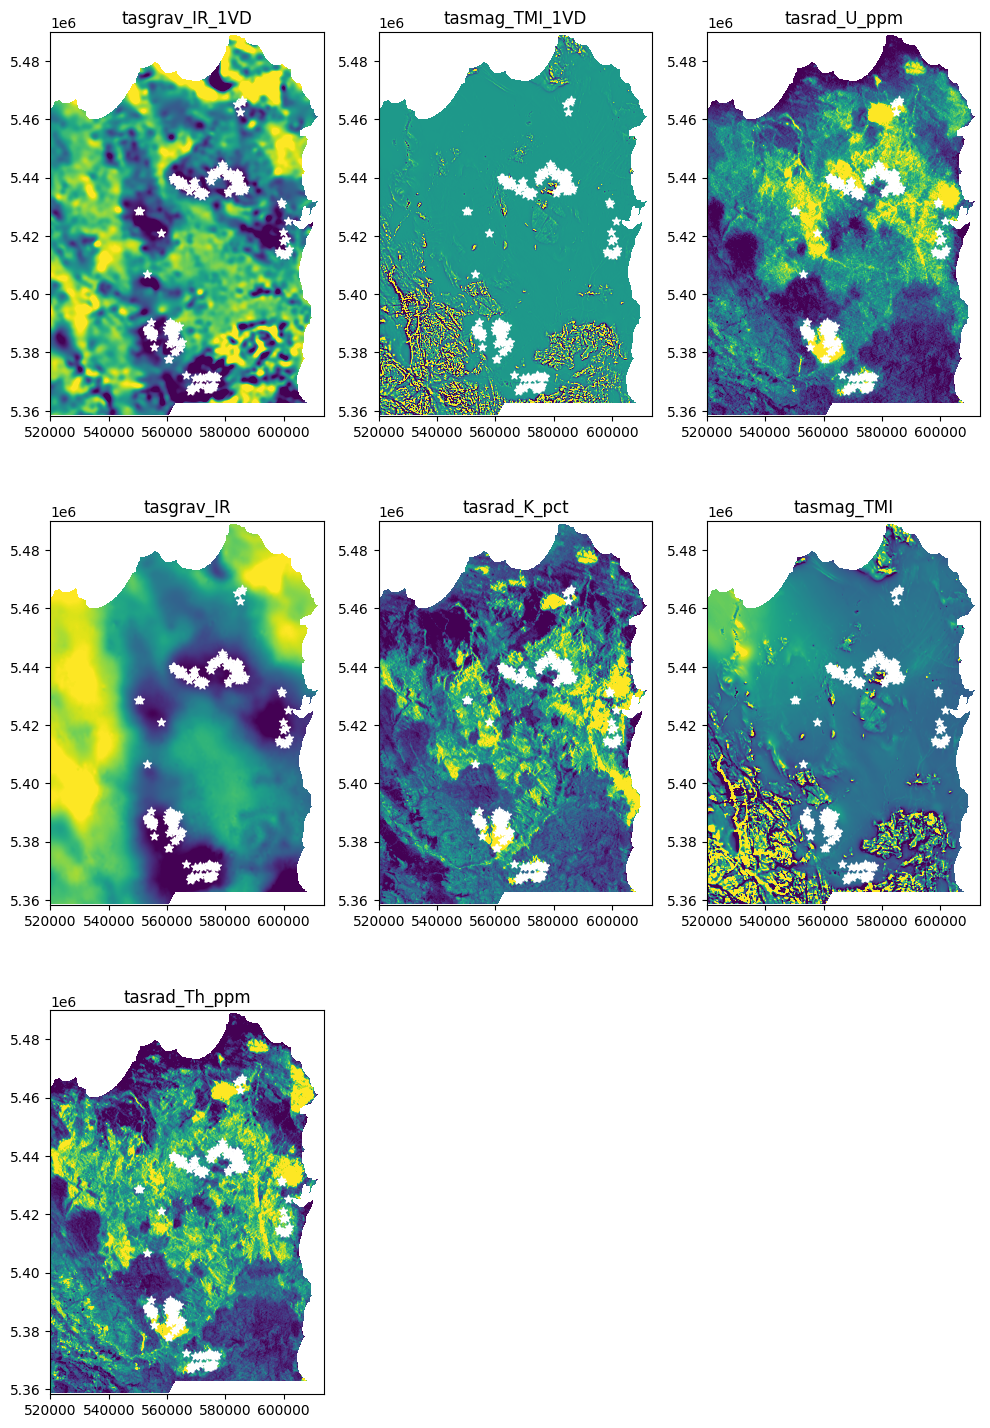

In [10]:
#plot the data

fig, axes = plt.subplots(3,3,figsize=(12,18))
for i, ax in enumerate(axes.flatten()):
  if i<data.shape[0]:
    ax.imshow(data[i], vmin = np.nanpercentile(data[i],5), vmax = np.nanpercentile(data[i],95), extent=region)
    ax.set(title=names[i])
    df.plot(ax=ax, marker='*', facecolor='w')
  else:
    ax.axis('off')
plt.show()

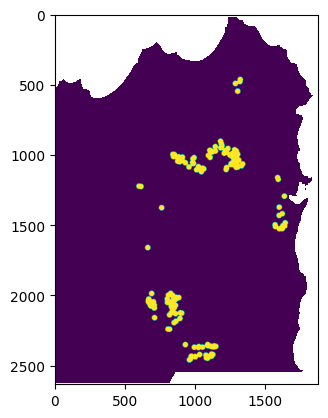

In [11]:
#import rasterize module

from rasterio.features import rasterize

#rasterize the point
geometry_generator = ((geom,1) for geom in df.buffer(1000).geometry)
labels = rasterize(shapes = geometry_generator, out_shape = data[0].shape, fill=0, transform = transform).astype('float32')
labels[nodata_mask] = np.nan

plt.imshow(labels)

##Convert 3D data cube to 2D tabular array

In [12]:
X_pix = data.reshape((data.shape[0], data.shape[1]*data.shape[2])).T  #T is for transpose

X_pix, X_pix.shape, data.shape

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 (4939508, 7),
 (7, 2633, 1876))

In [13]:
y_pix = labels.flatten()

y_pix.shape

(4939508,)

In [14]:
#remove nans
X = X_pix[~np.isnan(y_pix)]
y = y_pix[~np.isnan(y_pix)]

X.shape, y.shape

((4002948, 7), (4002948,))

#Train Models and Evaluating Them

In [15]:
#import modelling modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [16]:
#generating train and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((2802063, 7), (1200885, 7))

In [17]:
#Define model

model1 = RandomForestClassifier(n_jobs=-1)
model1.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1)

In [18]:
#import metrics
from sklearn.metrics import roc_curve, auc

#evaluate model on test data
y_prob = model1.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_prob) #fpr:false positive rate, tpr:true positive rate

roc_auc = auc(fpr, tpr)

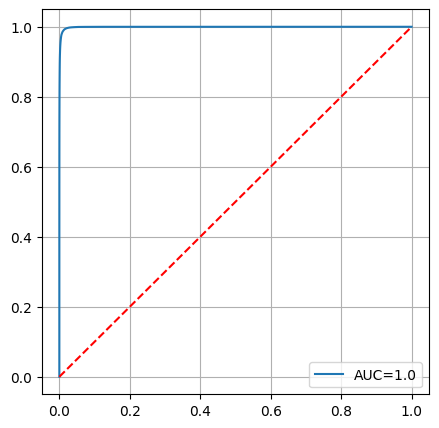

In [19]:
#plotting results
fig,ax= plt.subplots(figsize=(5,5))
ax.plot(fpr, tpr, label='AUC={}'.format(round(roc_auc,2)))
ax.plot([0,1],[0,1],'--r')
ax.legend()
ax.grid()
plt.show()

In [20]:
#Define a function to get probability map
def get_prob(X_pix, nodata_mask, model):
  #remove nulls
  X = X_pix[np.invert(nodata_mask.flatten())]
  #get predictions
  predictions = model.predict_proba(X)[:,1]
  #create output array
  pred_ar = np.zeros(shape = nodata_mask.flatten().shape, dtype='float32')
  #insert predictions
  pred_ar[np.invert(nodata_mask.flatten())] = predictions
  #reshape to spatial
  pred_ar = pred_ar.reshape(nodata_mask.shape)
  pred_ar[nodata_mask] = np.nan
  return pred_ar

pred_ar1 = get_prob(X_pix, nodata_mask, model1)


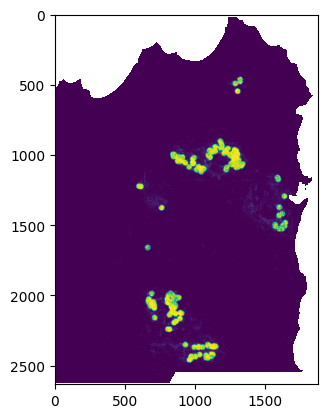

In [21]:
plt.imshow(pred_ar1)

In [22]:
#import Random undersampler

from imblearn.under_sampling import RandomUnderSampler

#stratify classes with random undersampler

rus=RandomUnderSampler(random_state=42)

X_strat, y_strat = rus.fit_resample(X,y)

X.shape, X_strat.shape

((4002948, 7), (221478, 7))

In [23]:
#now generate new traing and testing set for undersampled data

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_strat, y_strat, test_size=0.3, random_state=42)

#train model dn fir the data
model2=RandomForestClassifier(n_jobs=-1)
model2.fit(X_train1, y_train1)

RandomForestClassifier(n_jobs=-1)

In [24]:
#import metrics
from sklearn.metrics import roc_curve, auc

#evaluate model on test data
y_prob1 = model2.predict_proba(X_test1)[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_test1, y_prob1) #fpr:false positive rate, tpr:true positive rate

roc_auc1 = auc(fpr1, tpr1)

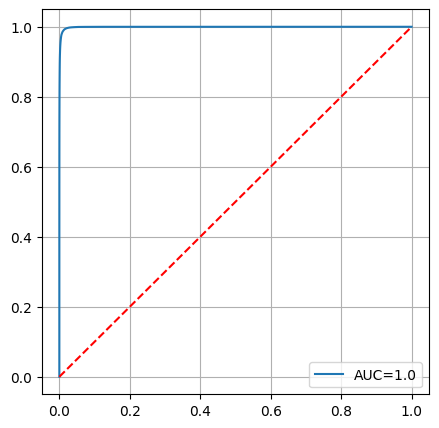

In [25]:
#plotting results
fig,ax= plt.subplots(figsize=(5,5))
ax.plot(fpr, tpr, label='AUC={}'.format(round(roc_auc1,2)))
ax.plot([0,1],[0,1],'--r')
ax.legend()
ax.grid()
plt.show()

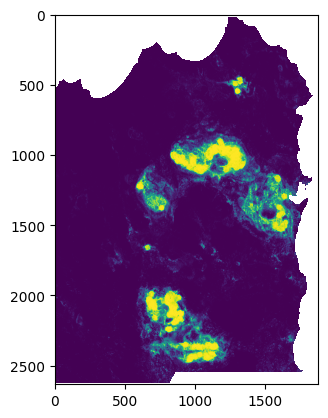

In [26]:
pred_ar2 = get_prob(X_pix, nodata_mask, model2)
plt.imshow(pred_ar2)

In [27]:
# define checkerboard function
def make_checkerboard(boardsize, squaresize):
  '''
  props to stackoverflow user Blubberguy22, posted March 17, 2020 at 19:00
  https://stackoverflow.com/questions/2169478/how-to-make-a-checkerboard-in-numpy
  '''
  return np.fromfunction(lambda i, j: (i//squaresize[0])%2 != (j//squaresize[1])%2, boardsize).astype('float32')



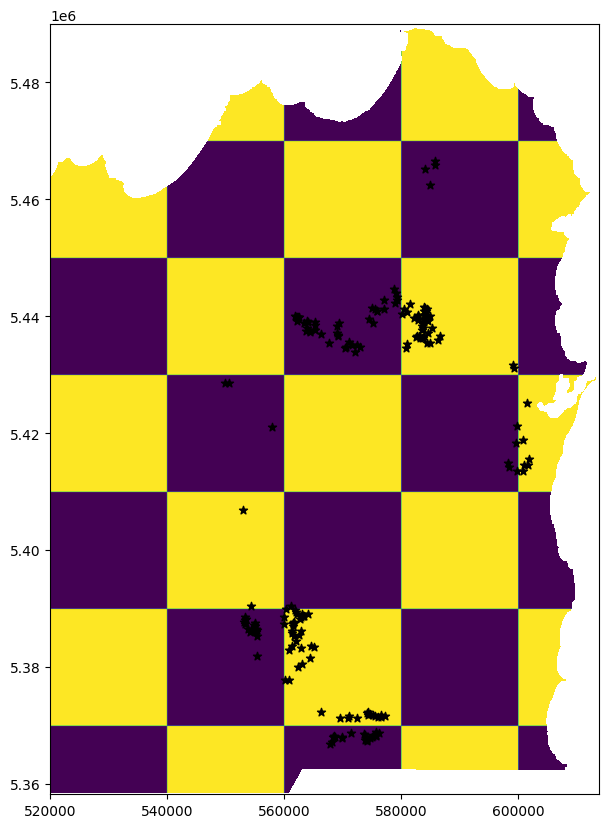

In [28]:


# make checkerboard
checker = make_checkerboard(data[0].shape, (400,400))
checker[nodata_mask] = np.nan

#plot checkerboard
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(checker, extent=region)
df.plot(ax=ax, marker='*', facecolor='black')
plt.show()

In [29]:
#split data into checkers
X_check0= X_pix[checker.flatten()==0]
y_check0= y_pix[checker.flatten()==0]

X_check1= X_pix[checker.flatten()==1]
y_check1= y_pix[checker.flatten()==1]

#remove nans
X_check0 = X_check0[~np.isnan(y_check0)]
y_check0 = y_check0[~np.isnan(y_check0)]

X_check1 = X_check1[~np.isnan(y_check1)]
y_check1 = y_check1[~np.isnan(y_check1)]

print(f'Checker 0: x array data shape:{X_check0.shape}, y array data shape:{y_check0.shape}')
print(f'Checker 1: x array data shape:{X_check1.shape}, y array data shape:{y_check1.shape}')

Checker 0: x array data shape:(1949724, 7), y array data shape:(1949724,)
Checker 1: x array data shape:(2053224, 7), y array data shape:(2053224,)


In [30]:
#run undersampling
X_check0, y_check0 = rus.fit_resample(X_check0, y_check0)
X_check1, y_check1 = rus.fit_resample(X_check1, y_check1)

print(f'Checker 0 after undersampling : x array data shape:{X_check0.shape}, y array data shape:{y_check0.shape}')
print(f'Checker 1 after undersampling : x array data shape:{X_check1.shape}, y array data shape:{y_check1.shape}')

Checker 0 after undersampling : x array data shape:(114860, 7), y array data shape:(114860,)
Checker 1 after undersampling : x array data shape:(106618, 7), y array data shape:(106618,)


In [31]:
#fit the model

model3 = RandomForestClassifier(n_jobs=-1)
model4 = RandomForestClassifier(n_jobs=-1)

model3.fit(X_check0, y_check0)
model4.fit(X_check1, y_check1)

RandomForestClassifier(n_jobs=-1)

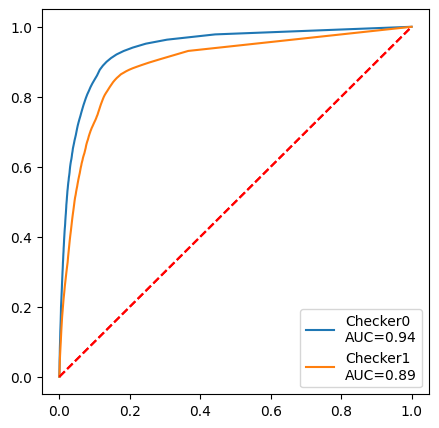

In [32]:
#get roc curve data

roc_data=[]

for model, X_check, y_check in zip([model3, model4],[X_check1, X_check0], [y_check1, y_check0]):
    # we are validating X_check1 for model 3 which is trained on X_check0 and similary for model4
    y_pred = model.predict_proba(X_check)[:,1]
    fpr, tpr, _ = roc_curve(y_check, y_pred)
    roc_auc = auc(fpr,tpr)
    roc_data.append((fpr, tpr, roc_auc))

#plot all this
fig, ax = plt.subplots(figsize=(5,5))
for i, (fpr, tpr, roc_auc) in enumerate(roc_data):
    ax.plot(fpr, tpr, label = f'Checker{i}\nAUC={round(roc_auc,2)}')
    ax.plot([0,1], [0,1], 'r--')
    ax.legend()

plt.show()

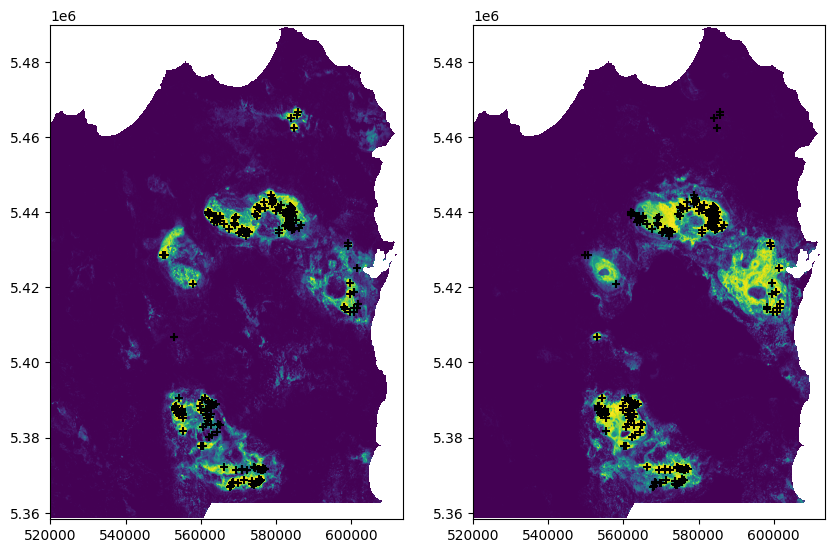

In [33]:
#generate probability maps

pred_ar3 = get_prob(X_pix, nodata_mask, model3)
pred_ar4 = get_prob(X_pix, nodata_mask, model4)

#plot probability maps

fig,ax = plt.subplots(1,2, figsize=(10,10))
for i, ar in enumerate([pred_ar3, pred_ar4]):
    ax[i].imshow(ar, extent = region)
    df.plot(ax=ax[i], marker='+', facecolor='black')

plt.show()

<Axes: >

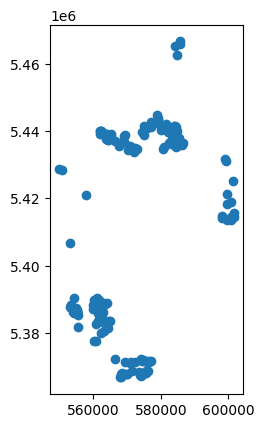

In [34]:
df.plot()

In [35]:
#import kmeans clustering

from sklearn.cluster import KMeans

In [36]:
#get occurence points

xy_pnts = [[geom.x, geom.y] for geom in df.geometry]
xy_pnts

[[599712.8224512797, 5413483.985752029],
 [600762.8242632954, 5413543.986292258],
 [598312.8196766924, 5414283.986581743],
 [601612.8253551747, 5414483.988295212],
 [600942.8241523714, 5414563.988154833],
 [598212.8192584014, 5414883.987591304],
 [601812.8252410719, 5415583.990302574],
 [599632.8203539669, 5418233.994007812],
 [600732.8220110157, 5418823.995486309],
 [599682.8192282203, 5421173.999111783],
 [601512.8207296586, 5425084.006577786],
 [599312.8145207159, 5431084.015829999],
 [599112.8139392667, 5431684.016756279],
 [584912.7888501289, 5435434.017621668],
 [586262.7909282557, 5435884.018847582],
 [586662.7913577629, 5436534.020069814],
 [585292.7886048486, 5437914.02186821],
 [584900.000000192, 5440000.000098914],
 [584907.7793468838, 5462442.061033722],
 [585712.7793696722, 5465884.066632973],
 [585812.779274071, 5466584.067743367],
 [583930.00000018, 5436650.000098984],
 [569112.7622933759, 5436684.014667315],
 [582612.784608627, 5436684.018901285],
 [569212.7624300662, 5

In [37]:
kmeans_obj = KMeans(n_clusters = 8).fit(xy_pnts)
df['labels'] = kmeans_obj.labels_ +1

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GID  DEPOSIT_ID                          NAME                 ALIAS  \
0   1987        1992                 Great Pyramid           Brocks Adit   
1  14795        2002              North Ringarooma  North Ringarooma Bay   
2   2008        2013  Western Pinnacles South area        Loila Pinnacle   
3  14800        2007                         Dunns                  None   
4  14834        2006                  North Orieco                  None   

   PARENT_ID              TYPE COMM_TYPE  \
0        NaN  Mine or Prospect    Metals   
1        NaN  Mine or Prospect    Metals   
2        NaN  Mine or Prospect    Metals   
3        NaN  Mine or Prospect    Metals   
4        NaN  Mine or Prospect    Metals   

                                 COMMODITYS  \
0  Tin, Silver, Copper, Arsenic, Lead, Zinc   
1                           Tin, Lead, Zinc   
2                               Tin, Copper   
3                      Copper, Arsenic, Tin   
4                                 Tin, Zinc   

                                            DESCRIPT  \
0                                   shafts and adits   
1                             a few surface trenches   
2                                surface exploration   
3  an adit and a shaft with pits and trenches alo...   
4  a shaft, gossanous outcrops extend 1 km along ...   

                            LOCALITY  ...  OUTCROPS WEATHERED  XTRCTBLTY  \
0                       Pyramid Hill  ...      None      None       None   
1              5-6km NW of Scamander  ...      None         Y       None   
2                   Fitzgerald Creek  ...      None      None       None   
3  the western bank of Eastern Creek  ...      None         Y       None   
4  Orieco Hill, ~6km NW of Scamander  ...      None         Y       None   

   USES TESTS GENETIC DATA_MTLGA  \
0  None  None    None       None   
1  None  None    None       None   
2  None  None    None       None   
3  None  None    None       None   
4  None  None    None       None   

                                                 REF  \
0  UR1928A_064_71, TR8_25_45, GSB53, 84_2218, 86_...   
1    GSB53, UR1941_005_11, 84_2218, 90_3120, 17_7703   
2                               GSB53, UR1941_055_57   
3  GSB53, GSB09, UR1941_005_11, ER8515S0, 84_2218...   
4  GSB53, UR1941_005_11, ER8515S0, 84_2218, 90_31...   

                         geometry labels  
0  POINT (599712.822 5413483.986)      5  
1  POINT (600762.824 5413543.986)      5  
2  POINT (598312.820 5414283.987)      5  
3  POINT (601612.825 5414483.988)      5  
4  POINT (600942.824 5414563.988)      5  

[5 rows x 39 columns]

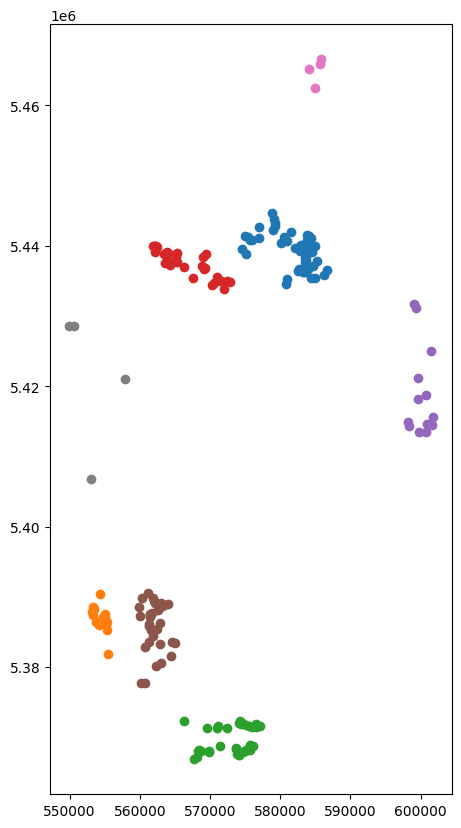

In [38]:
#plot clustered points
fig, ax = plt.subplots(figsize=(10,10))
for i in sorted(df.labels.unique()):
    df[df.labels==i].plot(ax=ax)

plt.show()

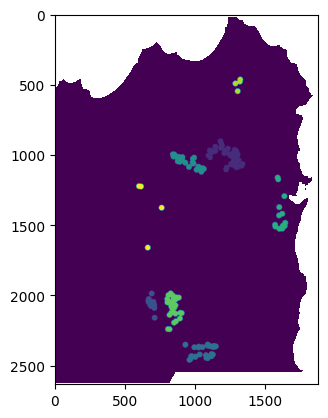

In [39]:
#generate raster label

geometry_generator = ((geom, i) for i, geom in zip(df.labels, df.buffer(1000).geometry))
clustermap = rasterize(shapes = geometry_generator, out_shape = data[0].shape, fill = 0, transform = transform).astype('float32')
clustermap[nodata_mask] = np.nan

plt.imshow(clustermap)

In [40]:
# create a data selection function
def cluster_pixel_selection(clustermap, data_cube, class_1_list):
  X = data_cube.reshape((data_cube.shape[0], data_cube.shape[1] * data_cube.shape[2])).T
  y = clustermap.flatten()
  X = X[~np.isnan(y)]
  y = y[~np.isnan(y)]
  y[np.isin(y, class_1_list)] = 1
  y[y!=1] = 0
  return X, y

# create a function to fit a model to input data
def fit_stratifiedrandomforest(X, y):
  X, y = rus.fit_resample(X, y)
  model = RandomForestClassifier(n_estimators=15, n_jobs=-1)
  return model.fit(X, y)

# define a function to determine performance on holdout occurence clusters
def holdout_roc_auc(clustermap, data_cube, holdout_cluster_list, model_cluster_list, model):
  X = data_cube.reshape((data_cube.shape[0], data_cube.shape[1] * data_cube.shape[2])).T
  y = clustermap.flatten()
  X = X[~np.isnan(y)]
  y = y[~np.isnan(y)]
  X = X[~np.isin(y, model_cluster_list)]
  y = y[~np.isin(y, model_cluster_list)]
  y[np.isin(y, holdout_cluster_list)] = 1
  # predict onto X
  y_pred = model.predict_proba(X)
  fpr, tpr, threshold = roc_curve(y, y_pred[:,1])
  roc_auc = auc(fpr, tpr)
  return fpr, tpr, roc_auc

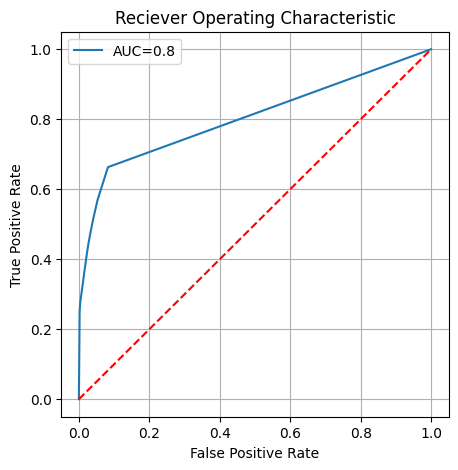

In [41]:
# train a model on cluster 1
X, y = cluster_pixel_selection(clustermap, data, [2])
model = fit_stratifiedrandomforest(X, y)
fpr, tpr, roc_auc = holdout_roc_auc(clustermap, data, [1,3,4,5,6,7,8], [2], model)

# visualise this
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(fpr, tpr, label='AUC={}'.format(round(roc_auc,2)))
ax.plot([0,1], [0,1], 'r--')
ax.set(title='Reciever Operating Characteristic',
       ylabel='True Positive Rate', xlabel='False Positive Rate')
ax.legend()
ax.grid()
plt.show()


In [42]:
#loop through clusters

models = []
fprs, tprs, roc_aucs = [], [], []
for i in sorted(df.labels.unique()):
    X, y = cluster_pixel_selection(clustermap, data, [j for j in range(1,9) if j!=i])
    model = fit_stratifiedrandomforest(X, y)
    fpr, tpr, roc_auc = holdout_roc_auc(clustermap, data, [i], [j for j in range(1,9) if j!=i], model)
    models.append(model)
    fprs.append(fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)


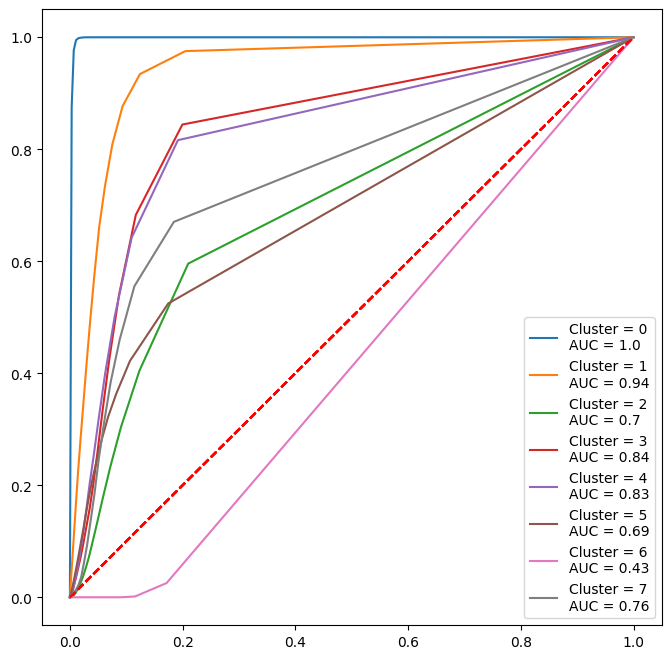

In [43]:
fig, ax = plt.subplots(figsize=(8,8))
for i ,(fpr, tpr, roc_auc) in enumerate(zip(fprs, tprs, roc_aucs)):
    ax.plot(fpr, tpr, label = f'Cluster = {i}\nAUC = {round(roc_auc,2)}')
    ax.legend()
    ax.plot([0,1], [0,1], '--r')



In [44]:
#Loop through models and get probability models

prob_maps = []
for m in models:
    prob_maps.append(get_prob(X_pix, nodata_mask, m))


In [45]:
#all models

prob_maps

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

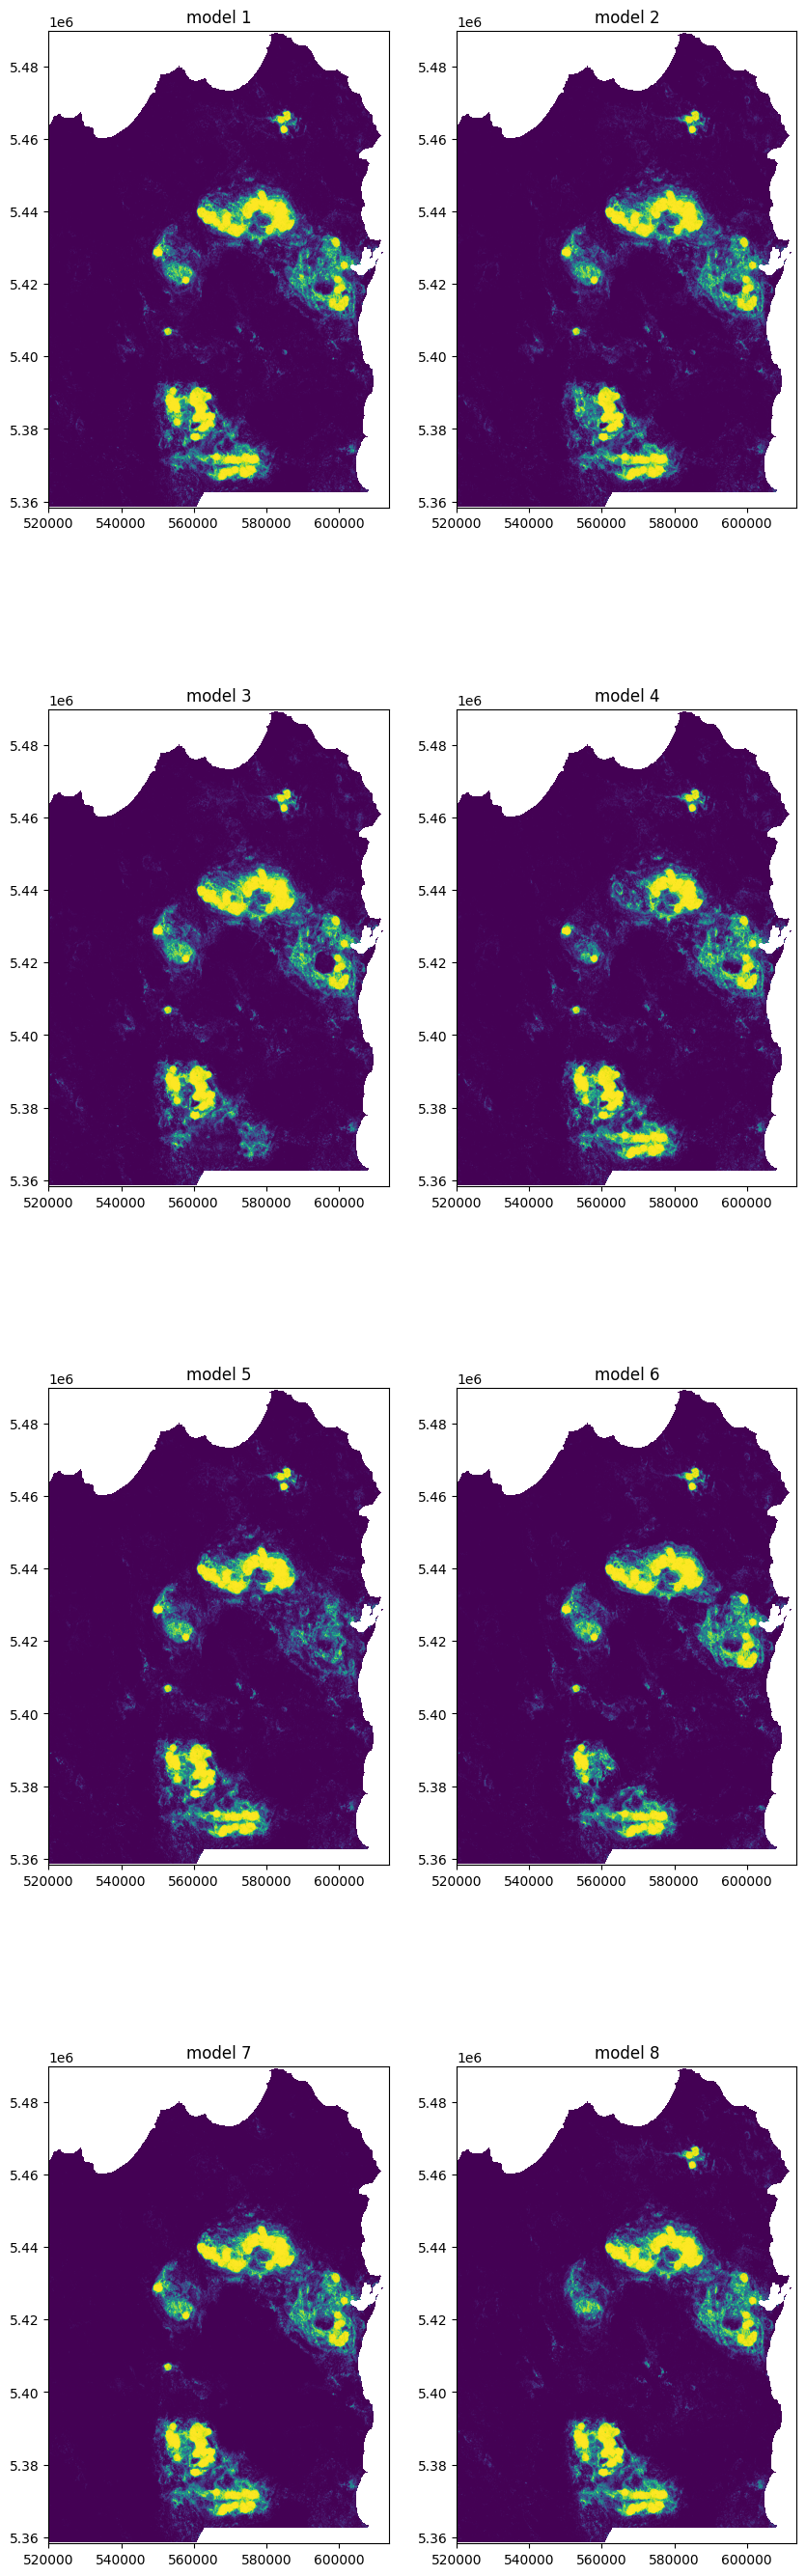

In [46]:
#plot all models

fig, axes = plt.subplots(4,2,figsize=(10,35))
for i, ax in enumerate(axes.flatten()):
    im = ax.imshow(prob_maps[i], extent = region)
    ax.set(title = 'model '+str(i+1))

plt.show()